# Rock-Paper-Scissors: Three-classes Classifier

In [2]:

!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip


--2023-10-02 12:56:23--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.207, 142.251.172.207, 64.233.191.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   196MB/s    in 1.0s    

2023-10-02 12:56:24 (196 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-10-02 12:56:25--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.207, 142.251.172.207, 64.233.191.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-te

In [3]:

import zipfile

local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()


In [4]:

import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])


total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock06ck02-072.png', 'rock06ck02-069.png', 'rock04-095.png', 'rock01-021.png', 'rock04-061.png', 'rock03-084.png', 'rock04-004.png', 'rock04-042.png', 'rock04-022.png', 'rock03-078.png']
['paper01-024.png', 'paper03-057.png', 'paper07-110.png', 'paper05-062.png', 'paper01-098.png', 'paper07-052.png', 'paper01-045.png', 'paper02-071.png', 'paper02-008.png', 'paper04-047.png']
['scissors03-030.png', 'scissors02-117.png', 'testscissors01-043.png', 'scissors03-073.png', 'scissors04-114.png', 'testscissors03-077.png', 'testscissors02-086.png', 'scissors04-011.png', 'scissors01-062.png', 'testscissors01-108.png']


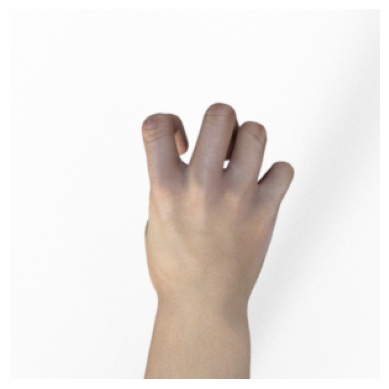

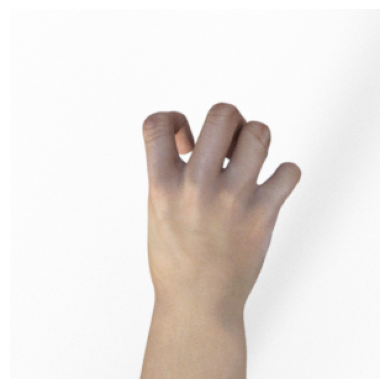

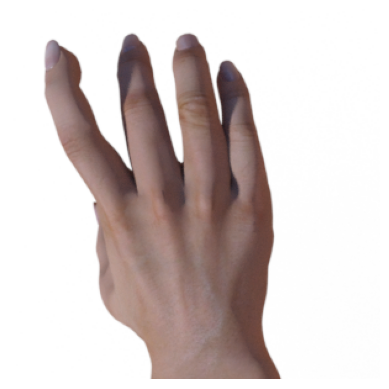

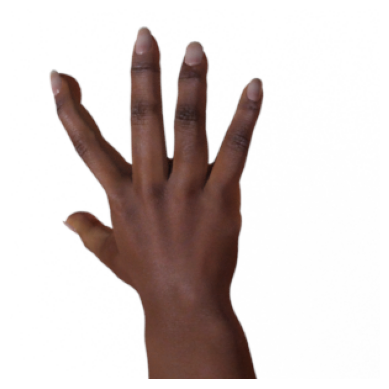

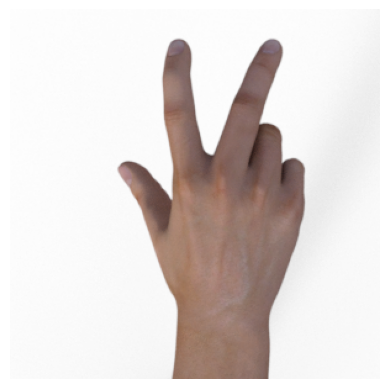

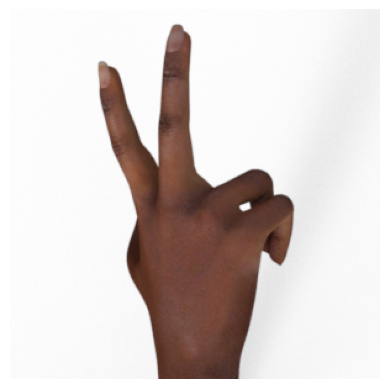

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()


In [6]:

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [7]:

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [8]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [9]:

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)


Epoch 1/25
20/20 [==============================] - 35s 1s/step - loss: 1.2033 - accuracy: 0.3345 - val_loss: 1.0939 - val_accuracy: 0.3387
Epoch 2/25
20/20 [==============================] - 23s 1s/step - loss: 1.0960 - accuracy: 0.3825 - val_loss: 1.0712 - val_accuracy: 0.6774
Epoch 3/25
20/20 [==============================] - 22s 1s/step - loss: 1.1137 - accuracy: 0.4504 - val_loss: 1.0199 - val_accuracy: 0.5753
Epoch 4/25
20/20 [==============================] - 22s 1s/step - loss: 0.9935 - accuracy: 0.5214 - val_loss: 0.7678 - val_accuracy: 0.7823
Epoch 5/25
20/20 [==============================] - 21s 1s/step - loss: 0.9679 - accuracy: 0.6028 - val_loss: 0.4280 - val_accuracy: 0.8548
Epoch 6/25
20/20 [==============================] - 23s 1s/step - loss: 0.7215 - accuracy: 0.6563 - val_loss: 0.6387 - val_accuracy: 0.6694
Epoch 7/25
20/20 [==============================] - 22s 1s/step - loss: 0.6794 - accuracy: 0.6865 - val_loss: 0.3955 - val_accuracy: 0.6962
Epoch 8/25
20/20 [==

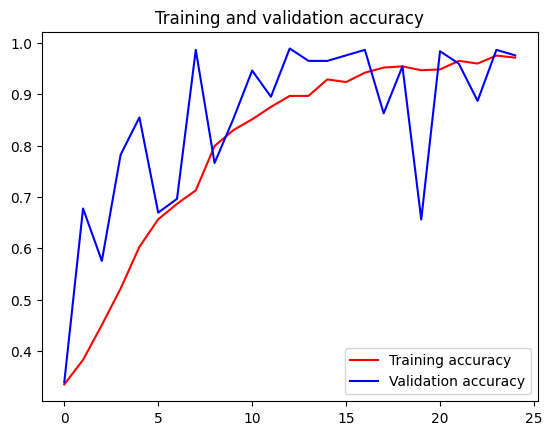

<Figure size 640x480 with 0 Axes>

In [10]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()
